In [13]:
import numpy as np
import pandas as pd
import matplotlib
import scipy.stats as ss
import matplotlib.pyplot as plt
import os, csv
from numpy import genfromtxt

In [2]:
def geneToNum(x):
    x = int(x[1:5])
    return x


def plotPermanova(data, taxdata):
    #import and filter
    df=pd.read_csv(data, sep=',',header=0,encoding="utf-8-sig",dtype={'p-value': float, 'test statistic': float, 'gene':str, 'number of groups':int})
    df.columns = df.columns.str.strip()
    
    df = df.sort_values(by='test statistic', ascending=True)
    
    fvalues = df['test statistic'].squeeze()
    sortedIndexbyF = fvalues.argsort()
    
    #compute pnova on species table/tree and get fstat. make that a line on graph
    df2 = pd.read_csv(taxdata, sep=',',header=0,encoding="utf-8-sig",dtype={'p-value': float, 'test statistic': float, 'gene':str, 'number of groups':int})
    df2.columns = df2.columns.str.strip()
    value = df2.iloc[0]['test statistic']
    plt.axhline(y = value, color = 'r', linestyle = 'dashed')
    plt.legend(['taxonomic baseline'])
    
    #plot
    plt.margins(x=0.1)
    plt.scatter(x=sortedIndexbyF,y=df['test statistic'],c=np.arange(0,len(df),1)) # c=np.arange(0,len(df),1)
    plt.gca().set(title='observed fstat values', ylabel='fstat')
    plt.show()

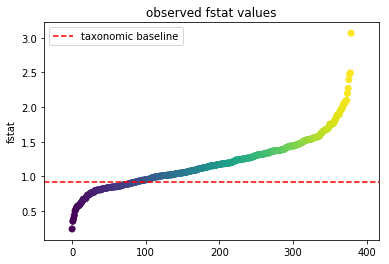

In [3]:
plotPermanova('../pnovaResults.csv','../../pnovaTaxonomic.csv')

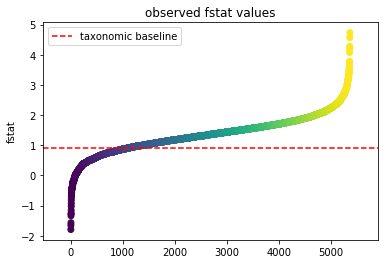

In [4]:
plotPermanova('../geneCombinations/pnovaResultsGC.csv','../../pnovaTaxonomic.csv')

In [5]:
def fstatFreqog(data):
    #import and filter
    df=pd.read_csv(data, sep=',',header=0,encoding="utf-8-sig",dtype={'p-value': float, 'test statistic': float, 'gene':str, 'number of groups':int})
    df.columns = df.columns.str.strip()
    
    
    #get frequency of fstat
    df = df.round({'test statistic': 2})
    counts = df['test statistic'].value_counts()



    #plot
    plt.margins(x=0.1)
    plt.hist(df['test statistic'], bins=50,color='teal', alpha=0.5) # c=np.arange(0,len(df),1)
    plt.gca().set(title='frequency of fstat histogram', ylabel='# of times fstat seen',xlabel="fstat")
    plt.show()

In [54]:
def parse(data):
     #import and filter data1
        df=pd.read_csv(data, sep=',',header=0,encoding="utf-8-sig",dtype={'p-value': float, 'test statistic': float, 'gene':str, 'number of groups':int})
        df.columns = df.columns.str.strip()
        df = df.round({'test statistic': 2})
        counts = df['test statistic'].value_counts()
        return df
    
def fstatFreq(dataList):
    plt.margins(x=0.1)
    colors=['lightcoral','black','mediumseagreen','blue','gray','orange']
    binz=[50,100,100,100,100,100]
    for index, data in enumerate(dataList):
        df = parse(data)
        plt.hist(df['test statistic'], bins=binz[index],color=colors[index], alpha=0.5, density=True)
    
    
    #plot
    plt.gca().set(title='Fstat Histogram over various gene combinations', ylabel='# of times fstat seen',xlabel="fstat")
    plt.legend(['1 gene','3 genes','5 genes','4 genes','5 genes','6 genes'])
    plt.show()

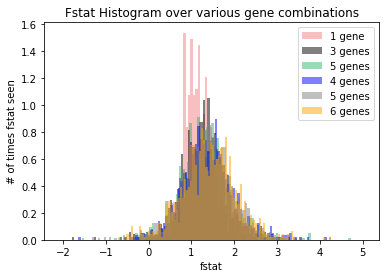

In [55]:
files = ['../pnovaResults.csv', '../pnova2genes.csv','../pnova3genes.csv','../pnova4genes.csv','../pnova5genes.csv','../pnova6genes.csv']
fstatFreq(files)

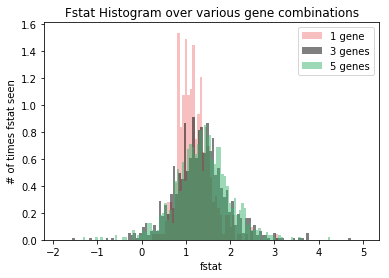

In [56]:
files = ['../pnovaResults.csv','../pnova3genes.csv','../pnova5genes.csv']
fstatFreq(files)

In [21]:
def kruskal(files):
    fstats = []
    for index, data in enumerate(files):
        df = parse(data)
        fstats.append(df['test statistic'])
    print(ss.kruskal(fstats[0], fstats[1], fstats[2]))

In [27]:
kruskal(files)
print("These distributions were significantly different (Kruskal Wallis, k=50.975, p=8.529e-12)")

KruskalResult(statistic=50.975138928504414, pvalue=8.5288254160513355e-12)
These distributions were significantly different (Kruskal Wallis, k=50.975, p=8.529e-12)


In [58]:
#fstatFreqog('../geneCombinations/pnovaResultsGC.csv')

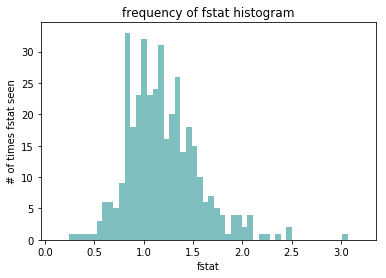

In [59]:
fstatFreqog('../pnovaResults.csv')

In [60]:
def mantelHist(data):
    df=pd.read_csv(data, sep=',',header=0,encoding="utf-8-sig",dtype={'p-value': float, 'correlational coefficient': float, 'gene':str, 'number of groups':int})
    df.columns = df.columns.str.strip()
    df = df.round({'correlational coefficient': 2})
    counts = df['correlational coefficient'].value_counts()

    counts = df['correlational coefficient'].value_counts()
    p0187 = df.iloc[186]
    
   
    
    #plot
    #plt.plot(x=counts[0])
    plt.margins(x=0.1)
    plt.hist(df['correlational coefficient'], bins=50,color='teal', alpha=0.5) # c=np.arange(0,len(df),1)
    plt.gca().set(title='frequency of correlational coefficient from mantel test', ylabel='# of times value seen',xlabel="")
    
    plt.plot(x=0.46,y = 15, marker='o', markersize=100, color='black', label='p0186')
        
    plt.show()


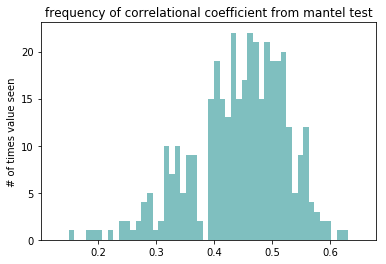

In [61]:
mantelHist('../mantelResults.csv')

In [24]:
#make table (dataframe) with gene, number of samples, how many sampels had +/-
#plot dot fstat onto mantel 